In [1]:
 from pandas_datareader import wb
  

In [2]:
 import geopandas 

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
data = wb.download(indicator="FP.CPI.TOTL.ZG", country=("all"),start=2019, end=2019)
data = data.reset_index(1)
data.columns=["Years","Inflation"]

In [6]:
data.head(10)

,Years,Inflation
country,,
Africa Eastern and Southern,2019,3.923372
Africa Western and Central,2019,1.758565
Arab World,2019,1.091848
Caribbean small states,2019,1.431356
Central Europe and the Baltics,2019,2.664561
Early-demographic dividend,2019,2.762520
East Asia & Pacific,2019,1.703979
East Asia & Pacific (excluding high income),2019,2.480279
East Asia & Pacific (IDA & IBRD countries),2019,2.480279


In [7]:
data.nlargest(10, "Inflation")

,Years,Inflation
country,,
South Sudan,2019,87.241364
Sudan,2019,50.994052
"Iran, Islamic Rep.",2019,39.907346
Haiti,2019,18.703783
Angola,2019,17.081215
Ethiopia,2019,15.840322
Turkey,2019,15.176822
Sierra Leone,2019,14.803059
Nigeria,2019,11.396795


In [8]:
data.nsmallest(10, "Inflation")

,Years,Inflation
country,,
Burkina Faso,2019,-3.233389
Niger,2019,-2.489793
Saudi Arabia,2019,-2.093333
United Arab Emirates,2019,-1.931081
Kiribati,2019,-1.881100
Mali,2019,-1.658267
Cote d'Ivoire,2019,-1.106863
Chad,2019,-0.971939
Benin,2019,-0.705027


In [9]:
map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
map = map[map['name'] != 'Antarctica']

index_change = {"United States of America" : "United States",
               "Russia" : "Russian Federation"}

map = map.rename(index = index_change)

map = map.set_index("name")

data = map.join(data, how='outer')
pd.set_option('display.max_columns',10)
pd.set_option('display.max_row',300)
pd.set_option('display.width',1000)
map

,pop_est,continent,iso_a3,gdp_md_est,geometry
name,,,,,
Fiji,920938,Oceania,FJI,8374.00,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
Tanzania,53950935,Africa,TZA,150600.00,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
W. Sahara,603253,Africa,ESH,906.50,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
Canada,35623680,North America,CAN,1674000.00,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
United States of America,326625791,North America,USA,18560000.00,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
Kazakhstan,18556698,Asia,KAZ,460700.00,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
Uzbekistan,29748859,Asia,UZB,202300.00,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
Papua New Guinea,6909701,Oceania,PNG,28020.00,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
Indonesia,260580739,Asia,IDN,3028000.00,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."


In [10]:
pip install mapclassify

<AxesSubplot:>

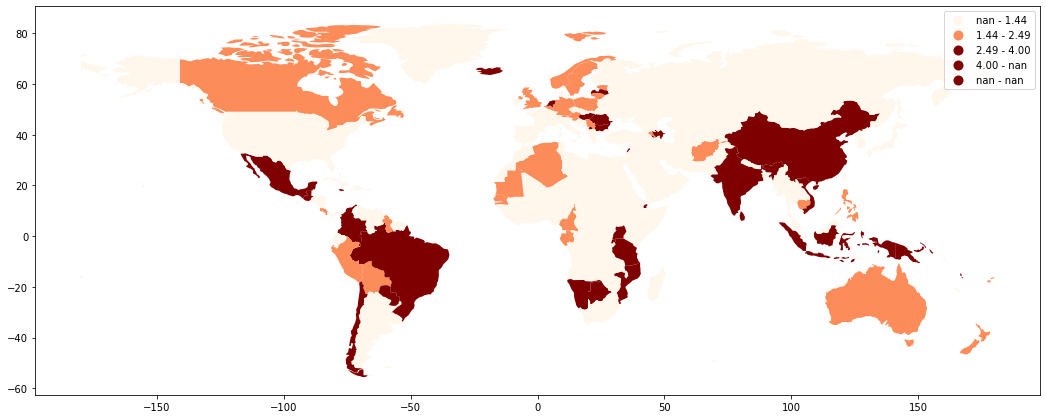

In [11]:
data.plot('Inflation', cmap='OrRd', scheme='quantiles', legend = True, figsize = (18,8))
 

In [12]:
data = wb.download(indicator="FP.CPI.TOTL.ZG", country="all",start=2020, end=2020)
data = data.reset_index(1)
data.columns=["Years","Inflation"]

In [13]:
data.head(10)

,Years,Inflation
country,,
Africa Eastern and Southern,2020,4.978097
Africa Western and Central,2020,2.425007
Arab World,2020,1.777408
Caribbean small states,2020,NaN
Central Europe and the Baltics,2020,1.672441
Early-demographic dividend,2020,2.963550
East Asia & Pacific,2020,1.817765
East Asia & Pacific (excluding high income),2020,2.635229
East Asia & Pacific (IDA & IBRD countries),2020,2.635229


In [14]:
map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
map = map[map['name'] != 'Antarctica']

index_change = {"United States of America" : "United States",
               "Russia" : "Russian Federation"}

map = map.rename(index = index_change)

map = map.set_index("name")

data = map.join(data, how='outer')
pd.set_option('display.max_columns',10)
pd.set_option('display.max_row',10)
pd.set_option('display.width',1000)
map

,pop_est,continent,iso_a3,gdp_md_est,geometry
name,,,,,
Fiji,920938,Oceania,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
Tanzania,53950935,Africa,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
W. Sahara,603253,Africa,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
Canada,35623680,North America,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
United States of America,326625791,North America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...
Serbia,7111024,Europe,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
Montenegro,642550,Europe,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
Kosovo,1895250,Europe,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."


<AxesSubplot:>

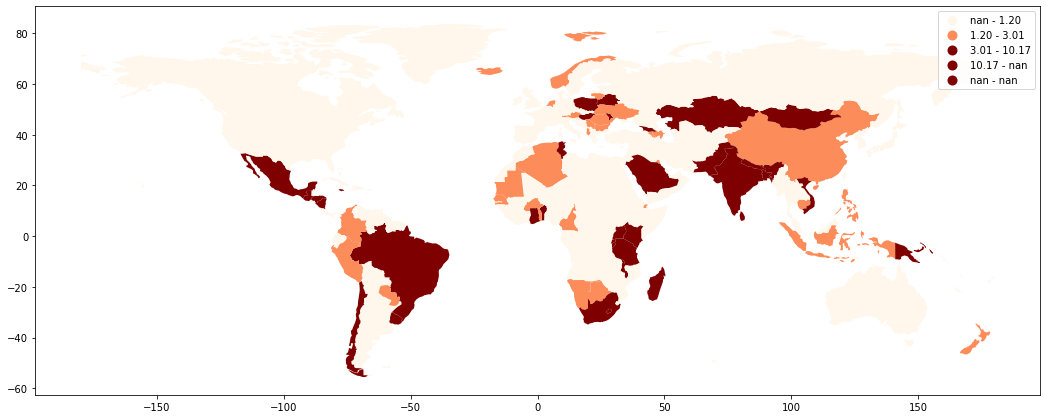

In [15]:
data.plot('Inflation', cmap='OrRd', scheme='quantiles', legend = True, figsize = (18,8))